In [1]:
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host import UserProfileHost
from prototype.constants import RecommendationType
from prototype.user_profile_host.utils import display_heatmap_user_profile_2d

/home/phahn/venvs/mmll/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Fit TSNE Representation Module from sklearn
n_rec = 20
toy_uph = UserProfileHost(original_prompt='test', n_recommendations=n_rec, recommendation_type=RecommendationType.FUNCTION_BASED, cache_dir='../cache/', n_embedding_axis=3, bo_beta=4)

# Run a few iterations to gather some points
for i in range(3):
    print(i)
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=n_rec)
    scores = torch.rand(size=(n_rec,))
    toy_uph.fit_user_profile(preferences=scores)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.80it/s]


0
1
2


# PCA transformation

/home/phahn/repositories/project-multimodal-machine-learning-lab-wise24/scripts/../prototype/user_profile_host/utils.py:124: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


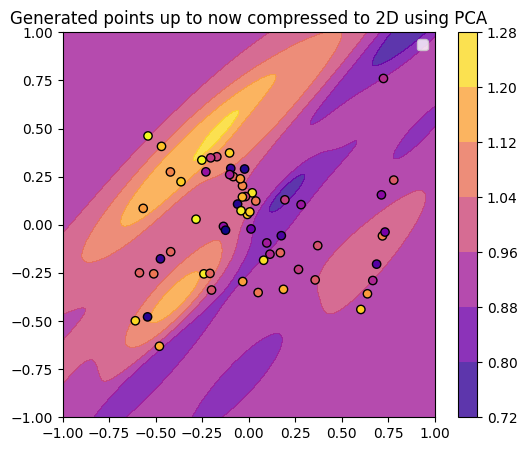

In [3]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='pca')
grid_x, grid_y, scores = low_d_user_profile
display_heatmap_user_profile_2d(low_d_embeddings=low_d_embeddings, grid_x=grid_x, grid_y=grid_y, scores=scores,  preferences=preferences, compression_technique='PCA', save_path="../prototype/output/")